In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Exercise 2.01 - Exploring the Attributes in Sales Data

#Load in the data and check it loaded correctly
sales = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter02/Exercise2.01/sales.csv')
sales.head(1)

# Examine the columns in the dataframe
sales.columns

#using the info function
sales.info()

#Look at the unique on years
sales['Year'].unique()

#Look at unique product lines 
sales['Product line'].unique()

#Look at the unique product type
sales['Product type'].unique()

#Look at unique product
sales['Product'].unique()

#Look at order method
sales['Order method type'].unique()

#Look at retailer country
sales['Retailer country'].unique()

#Look at the describe function of sales
sales.describe(include = 'all').T

#Look at the value_counts() on years
sales['Year'].value_counts()

#Look at value_counts() product lines 
sales['Product line'].value_counts()

#Look at the value_counts() product type
sales['Product type'].value_counts()

#Look at value_counts() product
sales['Product'].value_counts()

#Look at value_counts() order method
sales['Order method type'].value_counts()

#Look at retailer country value_counts()
sales['Retailer country'].value_counts()

#Get insights into country wide stats
sales.groupby('Retailer country')[['Revenue',
                                    'Planned revenue',
                                    'Product cost',
                                    'Quantity',
                                    'Gross profit']].sum()

#Find out the country whose product performance when sales dipped
sales.groupby('Retailer country')[['Revenue',
                                    'Planned revenue',
                                    'Product cost',
                                    'Quantity',
                                    'Gross profit']].min()

#Generate stats for other cat. var. for Year
sales.groupby('Year')[['Revenue',
                        'Planned revenue',
                        'Product cost',
                        'Quantity',
                        'Unit cost',
                        'Unit price',
                        'Gross profit',
                        'Unit sale price']].sum()

#Find out order method type contributes to revenue
sales.groupby('Order method type')[['Revenue',
                                    'Planned revenue',
                                    'Product cost',
                                    'Quantity',
                                    'Gross profit']].sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17823 entries, 0 to 17822
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               17823 non-null  int64  
 1   Product line       17823 non-null  object 
 2   Product type       17823 non-null  object 
 3   Product            17823 non-null  object 
 4   Order method type  17823 non-null  object 
 5   Retailer country   17823 non-null  object 
 6   Revenue            6045 non-null   float64
 7   Planned revenue    6045 non-null   float64
 8   Product cost       6045 non-null   float64
 9   Quantity           5860 non-null   float64
 10  Unit cost          6045 non-null   float64
 11  Unit price         6045 non-null   float64
 12  Gross profit       6045 non-null   float64
 13  Unit sale price    6045 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.9+ MB


,Revenue,Planned revenue,Product cost,Quantity,Gross profit
Order method type,,,,,
E-mail,3.238293e+07,3.301196e+07,1.768881e+07,1503654.0,1.352462e+07
Fax,1.376507e+07,1.399805e+07,7.399451e+06,653190.0,5.993243e+06
Mail,9.749679e+06,9.942812e+06,5.211545e+06,483151.0,4.175907e+06
Sales visit,6.946909e+07,7.141927e+07,3.870416e+07,3084491.0,2.890578e+07
Special,6.642340e+06,6.618693e+06,3.550795e+06,324760.0,2.824776e+06
Telephone,7.056328e+07,7.230265e+07,3.889483e+07,3200421.0,2.907046e+07
Web,4.251736e+08,4.328256e+08,2.332322e+08,18241196.0,1.776287e+08


In [ ]:
#Exercise 2.02 - Calculating conversion ratios for a website ads

#Import the data
data = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter02/Exercise2.02/conversion_rates.csv')
data.head(1)

#Group the data by column and count in a new df
converted_df = data.groupby('group').sum()
converted_df

#Change the name of converted to viewed
viewed_df = (data.groupby('group').count()
                .rename({'converted':'viewed'},
                        axis = 'columns')
            )
viewed_df

#Combine converted with viewed
stats = converted_df.merge(viewed_df, on = 'group')
stats

#Convert new column for conversion ratio
stats['conversion_ratio'] = stats['converted'] / stats['viewed']
stats

#Use the stack function 
df = stats.stack()
df

#Check conversion ratio of group a
df['A']['conversion_ratio']

#Bring it back to original format 
stats.unstack().unstack().round(4)




group,A,B
converted,90.0000,21.0000
viewed,1030.0000,970.0000
conversion_ratio,0.0874,0.0216


Year
2004    Axes(0.125,0.11;0.775x0.77)
2005    Axes(0.125,0.11;0.775x0.77)
2006    Axes(0.125,0.11;0.775x0.77)
2007    Axes(0.125,0.11;0.775x0.77)
dtype: object

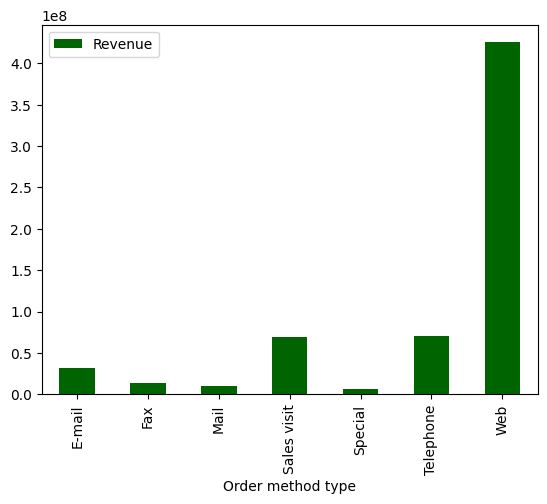

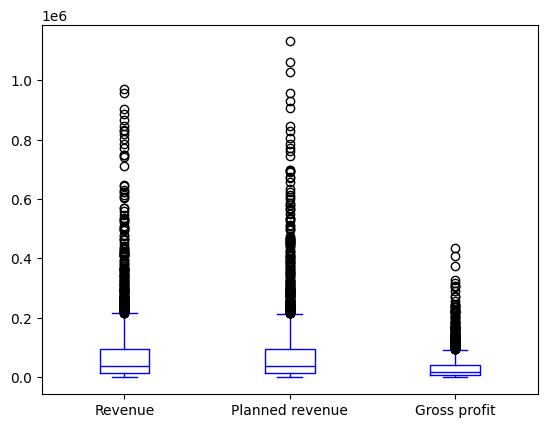

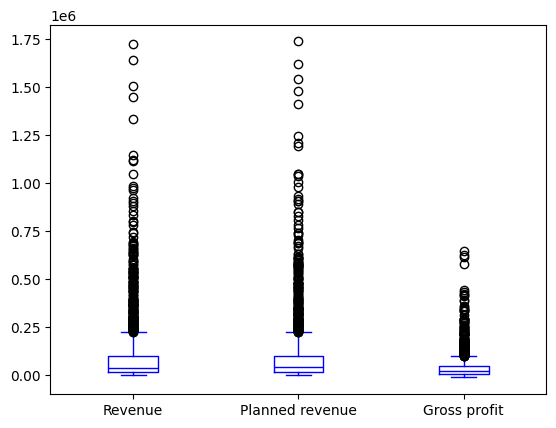

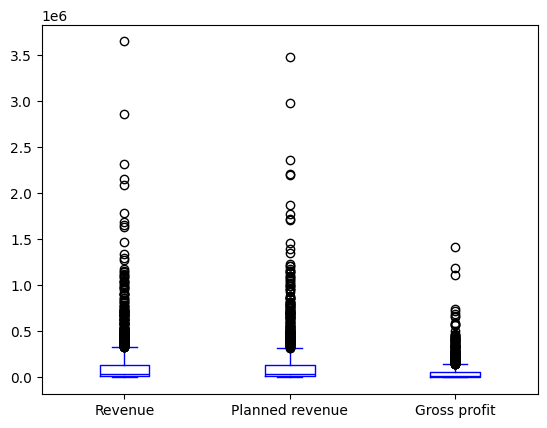

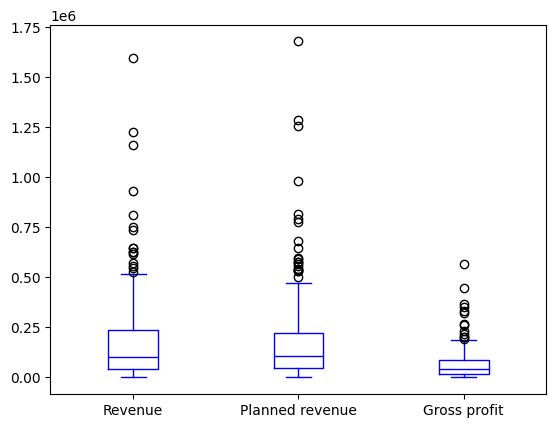

In [24]:
#Exercise 1.03 - Visualizing with Pandas 

#Load in dataset
sales = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter02/Exercise2.03/sales.csv')
sales.head(1)

#Group revenue by order method type
(sales.groupby('Order method type').sum()
        .plot(kind = 'bar', y = 'Revenue', color = 'darkgreen'))

#Group columns by year and create boxplots
(sales.groupby('Year')[['Revenue', 'Planned revenue','Gross profit']]
 .plot(kind = 'box',
       color = 'blue'))

In [ ]:
#Visualization types & when to use 
# Bar Plot      = Frequency of distribution of categorical variable
# Histogram     = Frequency of distribution of numerical values
# Pie Chart     = Composition of a group
# Scatter Plot  = Relationship between 2 continuous variables. Understand distribution
# Pair Plot     = Understand relationship between all possible combos of numeric values
# Density Plot  = Visualize the distribution of a continuous variable

The number of unique values in product column are: ['Mobile' 'Electronics' 'Laptops']
The following are the count of each Products
Mobile         129
Electronics     53
Laptops         18
Name: count, dtype: int64


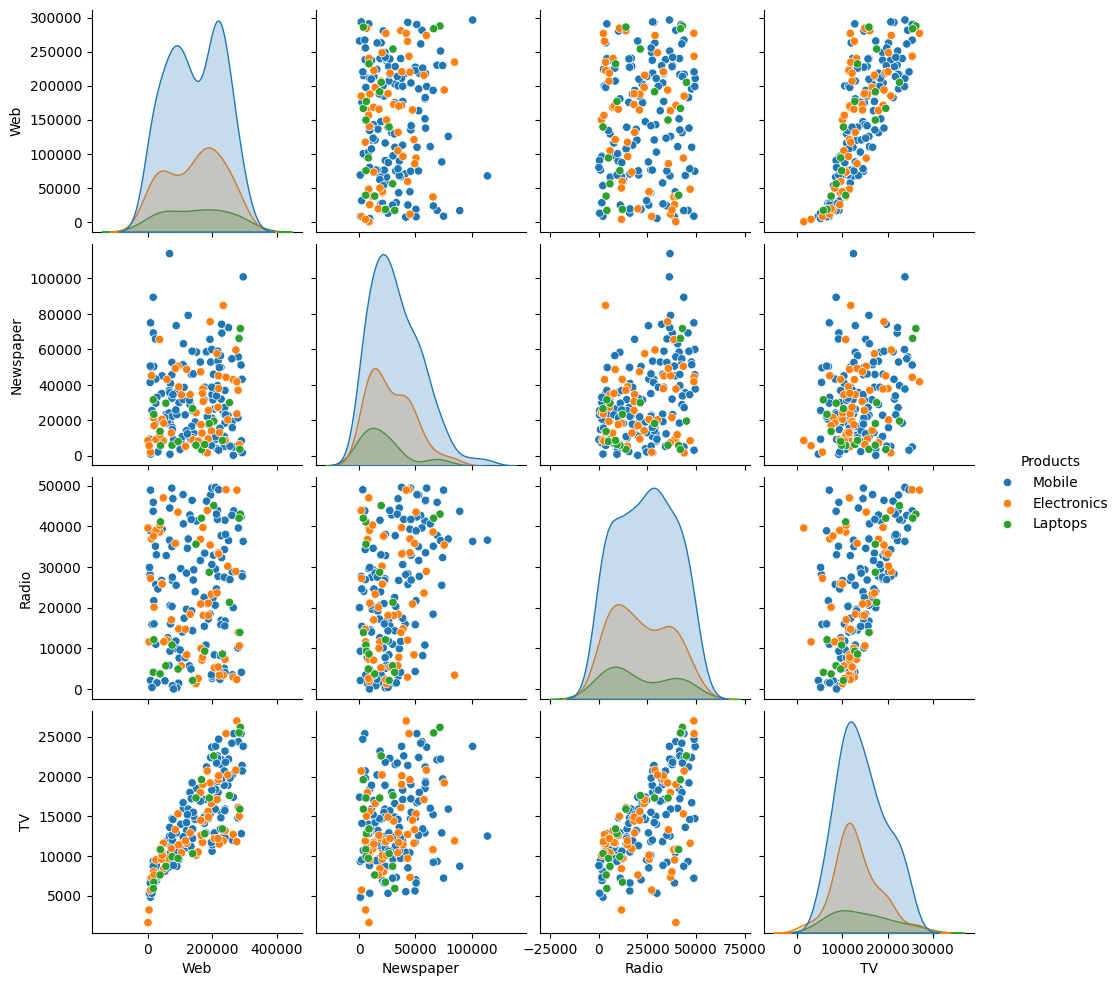

In [ ]:
# Activity 2.01

#Answer the following questions:
# - What are the unique values present in the products column
# - How many data points belong to each category in products column
# - What are teh total views across each category in products
# - Which product has the highest viewership on TV 
# - Which product has the lowest viewership on Web


#Load in the data
adv = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter02/Activity2.01/Advertising.csv')
adv.head(1)

#Look at the relationship between everything
sns.pairplot(adv, hue = 'Products')







In [38]:
adv.info()
adv.sample(5, random_state= 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       200 non-null    object
 1   Products   200 non-null    object
 2   Web        200 non-null    int64 
 3   Newspaper  200 non-null    int64 
 4   Radio      200 non-null    int64 
 5   TV         200 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


,Date,Products,Web,Newspaper,Radio,TV
179,18/05/2019,Electronics,165600,17600,10000,12600
155,24/04/2019,Electronics,4100,5700,11600,3200
23,13/12/2018,Mobile,228300,26200,16900,15500
159,28/04/2019,Electronics,131700,34600,18400,12900
96,24/02/2019,Mobile,197600,5900,3500,11700


In [ ]:
# - What are the unique values present in the products column
print('The number of unique values in product column are: {}'.format(adv.Products.unique()))

In [ ]:
# - How many data points belong to each category in products column
print('The following are the count of each {}'.format(adv.Products.value_counts()))

In [ ]:
# - What are the total views across each category in products
adv.groupby('Products')[['Web', 'Newspaper', 'Radio', 'TV']].sum()

,Web,Newspaper,Radio,TV
Products,,,,
Electronics,7734400,1500100,1161200,698300
Laptops,2711700,379200,374000,257800
Mobile,18962400,4231500,3117600,1848400


<Axes: xlabel='Products'>

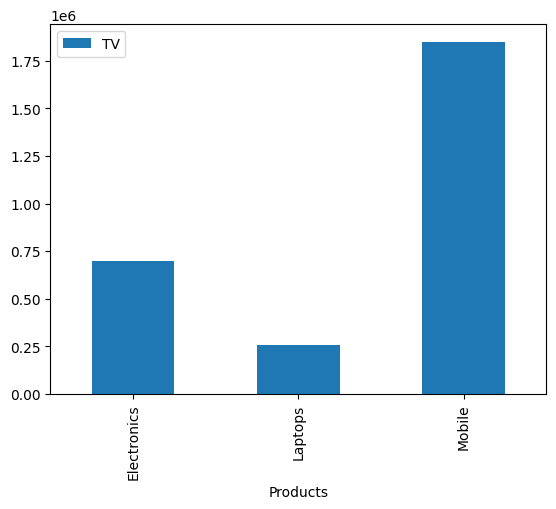

In [78]:
# - Which product has the highest viewership on TV 
tv_max = adv.groupby('Products')['TV'].max()
tv_max.iloc[0:1]

adv.groupby('Products').sum().plot(kind = 'bar', y = 'TV')

<Axes: xlabel='Products'>

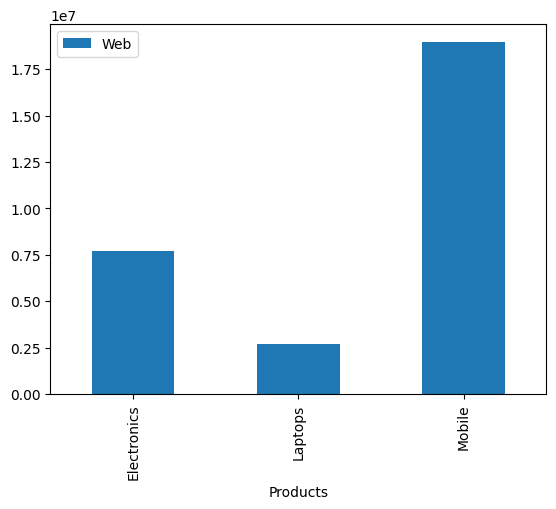

In [77]:
# - Which product has the lowest viewership on Web

web_min = adv.groupby('Products')['Web'].min()
web_min[0:1]

adv.groupby('Products').sum().plot(kind = 'bar', y = 'Web')
